# Enunciado

Tomando como base este tutorial, crea un modelo de clasificación usando KNN con los mismos datos sintéticos. Para la elección de los mejores hiperparámetros usa un sistema de validación cruzada.

In [8]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 1. Generamos los datos sintéticos

Creamos dos arrays bidimensionales:

- En el primero los datos seguirán una distribución normal de media 0 y desviación estándar 1. Representarán a la clase 0.
- En el segundo los datos seguirán una distribución normal de media 3 y desviación estándar 1. Representarán a la clase 1.

In [9]:
np.random.seed(41)
"""
Usamos la semilla 41 para que los números aleatorios sean los mismos
"""

# Clase 0
class_0_data = np.random.normal(0, 1, size=(100, 2))
class_0_labels = np.zeros(100)
"""
normal: 0 para que la media sea 0
        1 para que la desviación estándar sea 1
        size: (100, 2) para que el array sea de 100 filas y 2 columnas
zeros: 100 para que todos los valores sean 0
"""
# Clase 1
class_1_data = np.random.normal(3, 1, size=(100, 2))
class_1_labels = np.ones(100)

# 2. Cargamos los datos en un DataFrame

In [10]:
# Formateo y combinación de los datos
X = np.vstack((class_0_data, class_1_data))
y = np.concatenate((class_0_labels, class_1_labels))
"""
vstack: para apilar verticalmente los datos
concatenate: para concatenar los datos
"""

# Creación del los dataframes
df_class = pd.DataFrame(X, columns=['Columna_1', 'Columna_2'])
df_target = pd.DataFrame(y, columns=['Target'])
"""
X: datos
columns: para nombrar las columnas

y: etiquetas
columns: para nombrar la columna
"""

# Unimos los 2 dataframes y el target se modifica a tipo int para knn
df_complete = pd.concat([df_class, df_target], axis=1)
df_complete.Target = df_complete.Target.astype(int)
"""
concat: para unir los dataframes
axis: 1 para unirlos por columnas
astype: int para que el target sea de tipo int
"""
df_complete

,Columna_1,Columna_2,Target
0,-0.270712,0.104848,0
1,0.250528,-0.925200,0
2,0.567144,-1.040180,0
3,-0.153676,0.789852,0
4,-1.226216,-0.948007,0
...,...,...,...
195,3.754550,4.091037,1
196,3.957150,3.399005,1
197,1.118678,2.318888,1
198,4.010052,3.822308,1


# 3. Selección de las variables

,Columna_1,Columna_2,Target
Columna_1,1.000000,0.711657,0.810961
Columna_2,0.711657,1.000000,0.861755
Target,0.810961,0.861755,1.000000


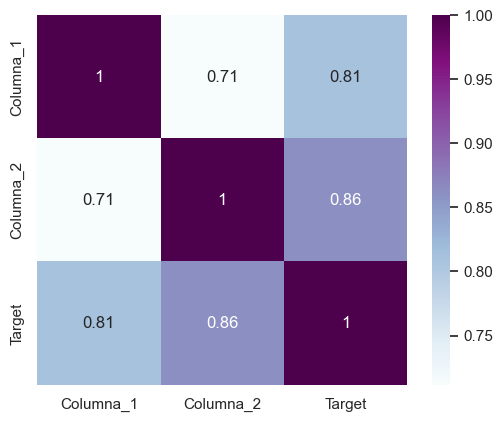

In [11]:
sns.set()
sns.heatmap(df_complete.corr(), square=True, annot=True, cmap='BuPu')
"""
square: True para que el mapa de calor sea cuadrado
annot: True para que aparezcan los valores en cada celda
cmap: BuPu para que el mapa de calor sea de color azul y morado
"""
df_complete.corr()

# 4. Parametrización del modelo y validación cruzada

In [12]:
# Dividimos en datos de test y de entrenamiento
TEST_SIZE = 0.33 # 33% de los datos para test y 67% para entrenamiento
train, test = train_test_split(df_complete, test_size = TEST_SIZE)

# Reiniciamos los índices para que no haya problemas
train.reset_index(inplace = True)
test.reset_index(inplace = True)
train

,index,Columna_1,Columna_2,Target
0,8,-0.609778,1.469416,0
1,19,-0.818308,-0.962384,0
2,138,1.548087,3.921564,1
3,173,4.853147,5.114540,1
4,185,2.514818,2.385031,1
...,...,...,...,...
129,90,-1.234605,1.470797,0
130,121,1.607519,3.988415,1
131,155,4.514982,3.480295,1
132,133,2.853887,1.907700,1


Usaremos K vecinos más cercanos del algoritmo KNN.

Max Value uniform : 1.0 (1)
Max Value distance : 1.0 (1)


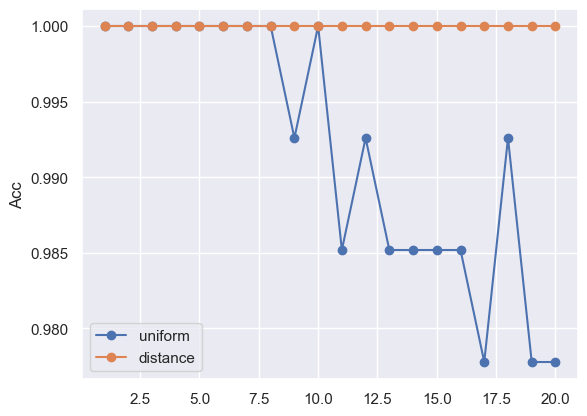

In [13]:
MAX_NEIGHBORDS = 20
MIN_NEIGHBORDS = 1
N_SPLITS = 5

cv = KFold(n_splits = N_SPLITS, shuffle = False)
"""
n_splits: número de divisiones
shuffle: False para que no mezcle los datos
"""

for i, weights in enumerate(['uniform', 'distance']):
    total_scores = []

    for n_neighbors in range(MIN_NEIGHBORDS,MAX_NEIGHBORDS+1):
        fold_accuracy = []
        knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        for train_fold, test_fold in cv.split(train):
            # División train test aleatoria
            f_train = train.loc[train_fold]
            f_test = train.loc[test_fold]

            # entrenamiento y ejecución del modelo
            knn.fit(X = f_train.drop(['Target'], axis=1),
                            y = f_train['Target'])
            y_pred = knn.predict(X = f_test.drop(['Target'], axis = 1))

            # evaluación del modelo
            acc = accuracy_score(f_test['Target'], y_pred)
            fold_accuracy.append(acc)

        total_scores.append(np.mean(fold_accuracy))

    plt.plot(range(1,len(total_scores)+1), total_scores, marker='o', label=weights)
    print ('Max Value ' +  weights + " : " +  str(max(total_scores)) +" (" + str(np.argmax(total_scores) + 1) + ")")
    plt.ylabel('Acc')

"""
enumerate: para enumerar los pesos
range: para recorrer el rango de vecinos
append: para añadir los valores a la lista
plot: para dibujar la gráfica
max: para obtener el valor máximo de la lista
argmax: para obtener el índice del valor máximo de la lista
plt.ylabel: para nombrar el eje y
"""

plt.legend()
plt.show()

# 5. Evaluación del modelo

In [14]:
# Seleccionamos la mejor parametrización obtenida
n_neighbors = 3
weights = 'distance'
knn = neighbors.KNeighborsClassifier(n_neighbors= n_neighbors, weights=weights)
y_test = test['Target']

# Entrenamiento y ejecución del modelo
knn.fit(X = train[['Columna_1','Columna_2']], y = train['Target'])
y_pred = knn.predict(X = test[['Columna_1','Columna_2']])
acc = accuracy_score(y_test, y_pred)
"""
fit: para entrenar el modelo
predict: para ejecutar el modelo
accuracy_score: para obtener la precisión del modelo
"""
print('Accuracy:', acc)

Accuracy: 0.9393939393939394


# 6. Visualización de la matriz de confusión

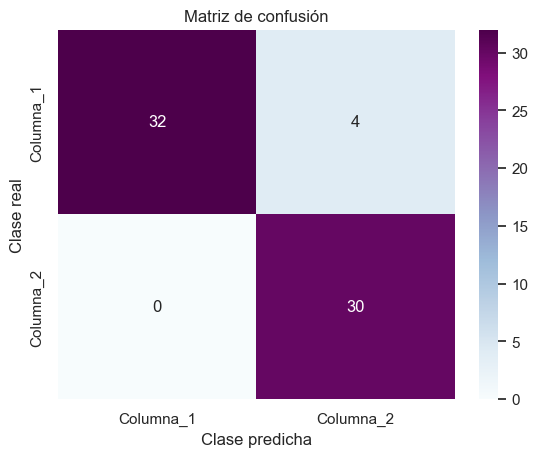

In [15]:
cm = confusion_matrix(y_test, y_pred)
classes = ('Columna_1', 'Columna_2')
sns.heatmap(cm, annot=True, cmap='BuPu', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de confusión')
plt.ylabel('Clase real')
plt.xlabel('Clase predicha')
plt.show()

Podemos observar los siguientes valores:

- 32 valores verdaderos positivos (TP)
- 30 valores verdaderos negativos (TN)
- 4 valores falsos positivos (FP)
- 0 valores falsos negativos (FN)